In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [87]:
Airline = pd.read_excel("C:/Users/admin/Desktop/DATA SCIENCE/assignments/clustering/Airlines.xlsx")

In [88]:
Airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
Airline.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
Airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
Airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [12]:
Airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [89]:
Airline.drop('ID#' , axis = 1 , inplace = True)

In [90]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# data visualization

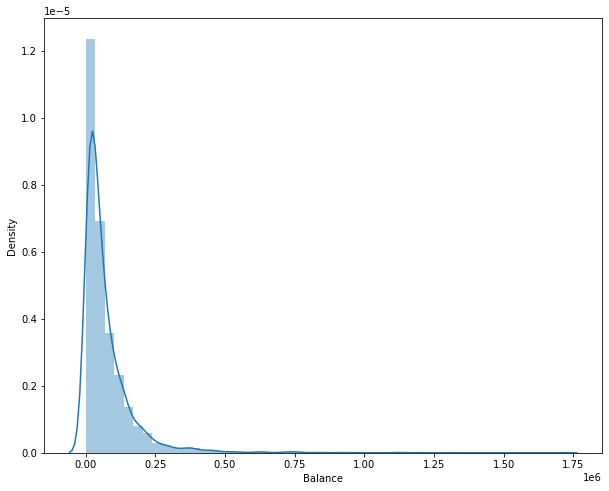

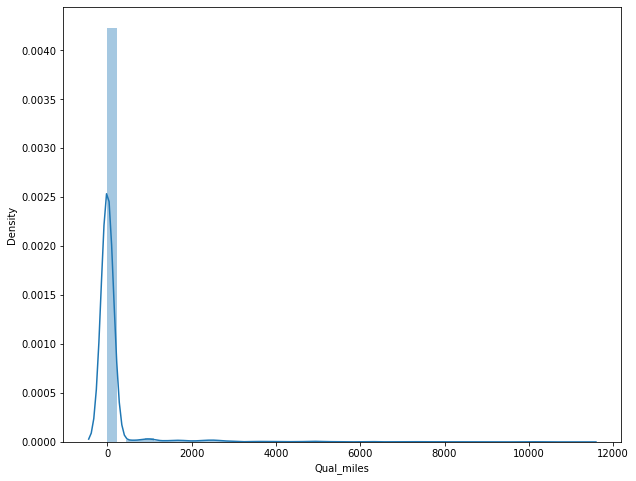

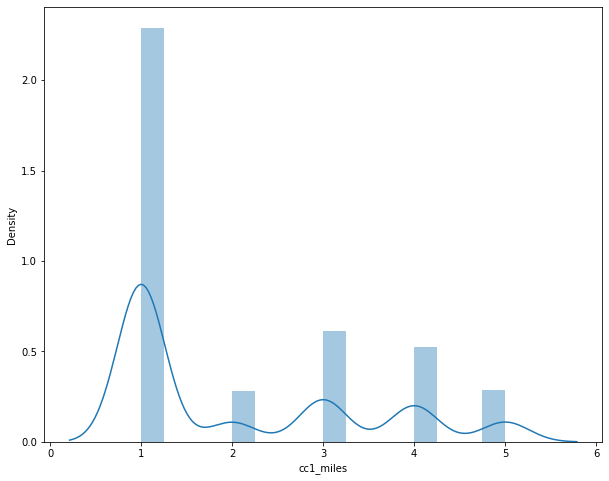

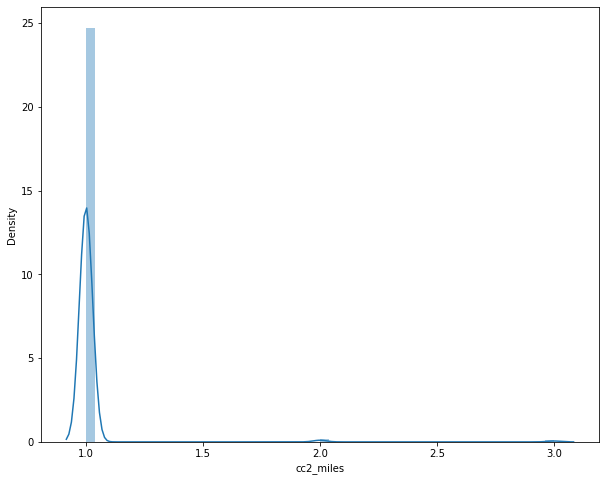

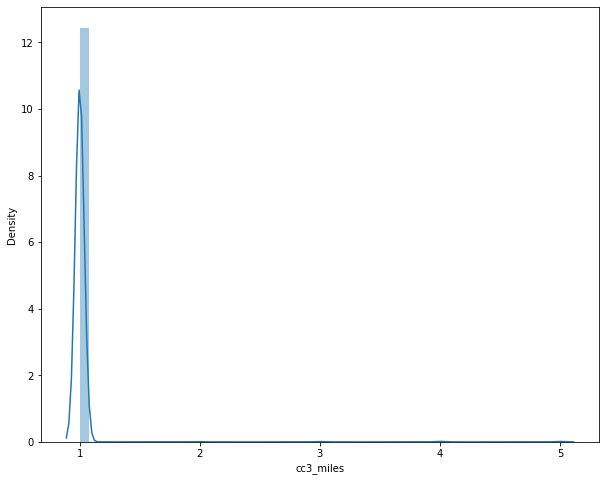

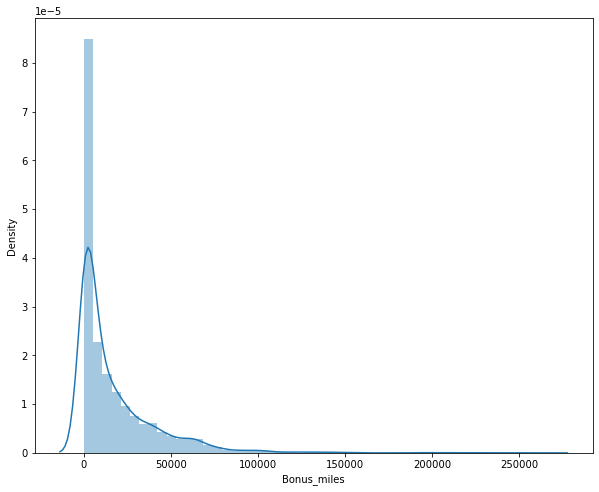

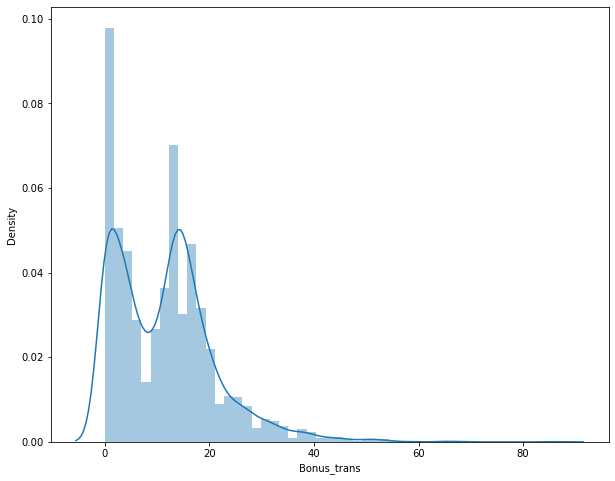

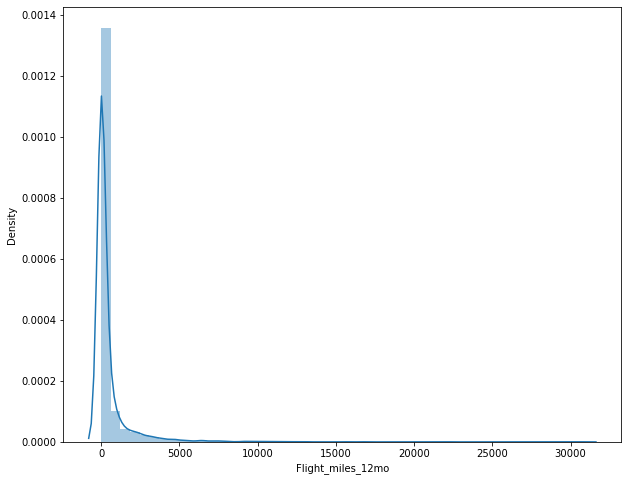

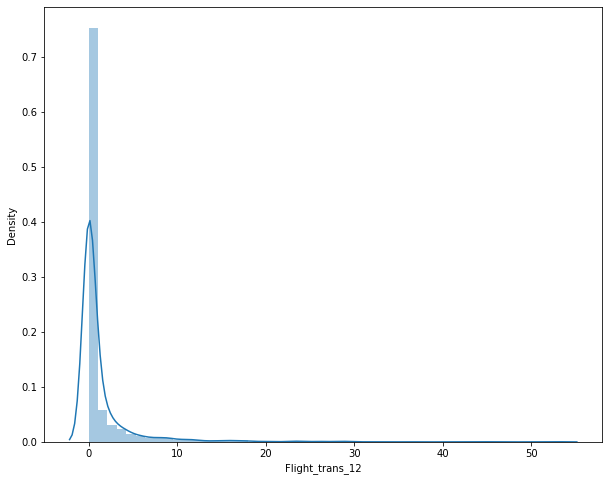

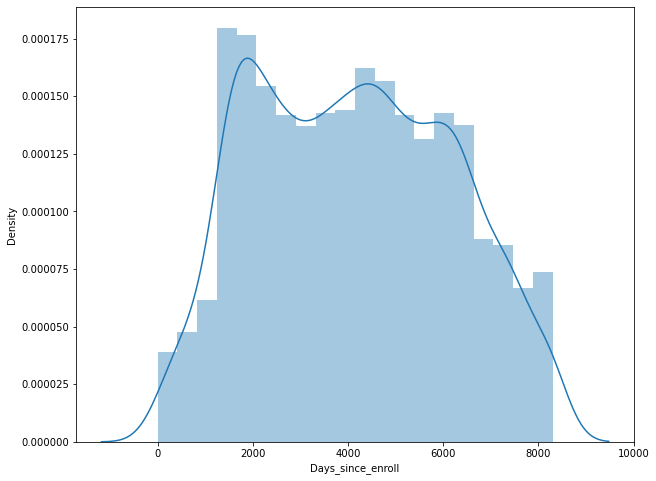

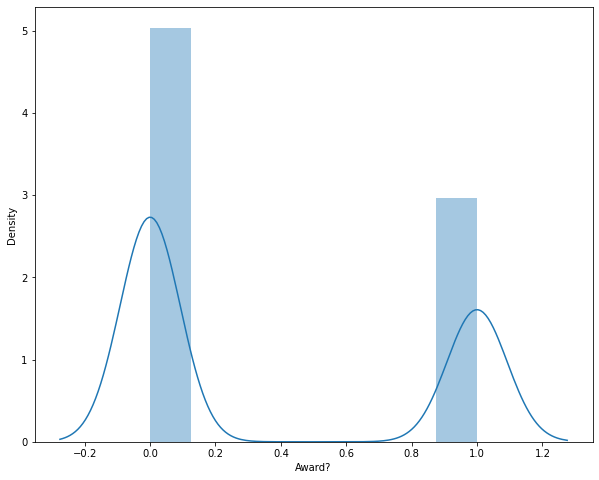

In [15]:
import warnings
warnings.filterwarnings('ignore')

for i in Airline.columns:
    plt.figure(figsize = (10,8))
    sns.distplot(Airline[i])
    

<AxesSubplot:>

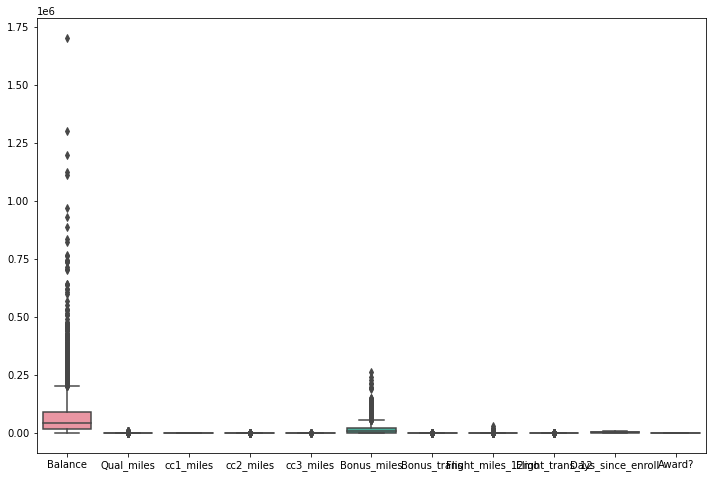

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data=Airline)

In [17]:
Airline.Balance.value_counts()

1000      10
2000       5
500        5
1500       4
5500       3
          ..
33517      1
25207      1
236274     1
4224       1
28670      1
Name: Balance, Length: 3904, dtype: int64

In [18]:
np.max(Airline.Balance)

1704838

In [19]:
Airline[Airline.Balance == 1704838]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
275,1704838,0,1,1,1,17108,32,4823,23,7283,1


In [93]:
Airline = Airline.drop(Airline.index[275] , axis = 0)

In [94]:
Airline.iloc[270:280]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
270,145726,0,3,1,1,19019,15,0,0,7292,1
271,121639,0,5,1,1,67286,7,0,0,7288,1
272,70676,0,5,1,1,74993,15,0,0,7288,1
273,18263,0,1,1,1,2100,4,1000,2,7285,0
274,51250,0,1,1,1,0,0,0,0,7283,0
276,12895,0,1,1,1,0,0,0,0,7277,0
277,120073,0,3,1,1,12423,29,0,0,7276,1
278,2003,0,1,1,1,980,2,0,0,7274,0
279,22652,0,5,1,1,57642,14,0,0,7271,1
280,168515,0,1,1,1,4600,4,0,0,7269,0


In [95]:
Airline = Airline.reset_index()

In [96]:
Airline.iloc[270:280]

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
270,270,145726,0,3,1,1,19019,15,0,0,7292,1
271,271,121639,0,5,1,1,67286,7,0,0,7288,1
272,272,70676,0,5,1,1,74993,15,0,0,7288,1
273,273,18263,0,1,1,1,2100,4,1000,2,7285,0
274,274,51250,0,1,1,1,0,0,0,0,7283,0
275,276,12895,0,1,1,1,0,0,0,0,7277,0
276,277,120073,0,3,1,1,12423,29,0,0,7276,1
277,278,2003,0,1,1,1,980,2,0,0,7274,0
278,279,22652,0,5,1,1,57642,14,0,0,7271,1
279,280,168515,0,1,1,1,4600,4,0,0,7269,0


In [97]:
Airline.drop('index' , axis =1 , inplace = True)

In [98]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

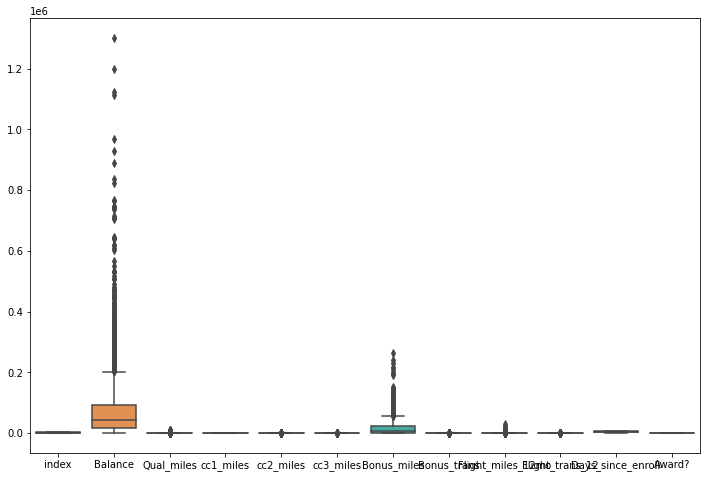

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=Airline)

# standardization of data

In [62]:
SC = StandardScaler()

In [63]:
scaled = SC.fit_transform(Airline)

In [64]:
scaled

array([[-1.73225794, -0.46244988, -0.18632279, ..., -0.36217223,
         1.39607323, -0.76666034],
       [-1.73139157, -0.55379978, -0.18632279, ..., -0.36217223,
         1.38057332, -0.76666034],
       [-1.73052519, -0.3268365 , -0.18632279, ..., -0.36217223,
         1.41254189, -0.76666034],
       ...,
       [ 1.729778  ,  0.00414391, -0.18632279, ..., -0.36217223,
        -1.31544258,  1.3043586 ],
       [ 1.73064438, -0.18779455, -0.18632279, ..., -0.09746207,
        -1.31592695, -0.76666034],
       [ 1.73151075, -0.72038322, -0.18632279, ..., -0.36217223,
        -1.31738007, -0.76666034]])

# Agglomerative clustering

In [28]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

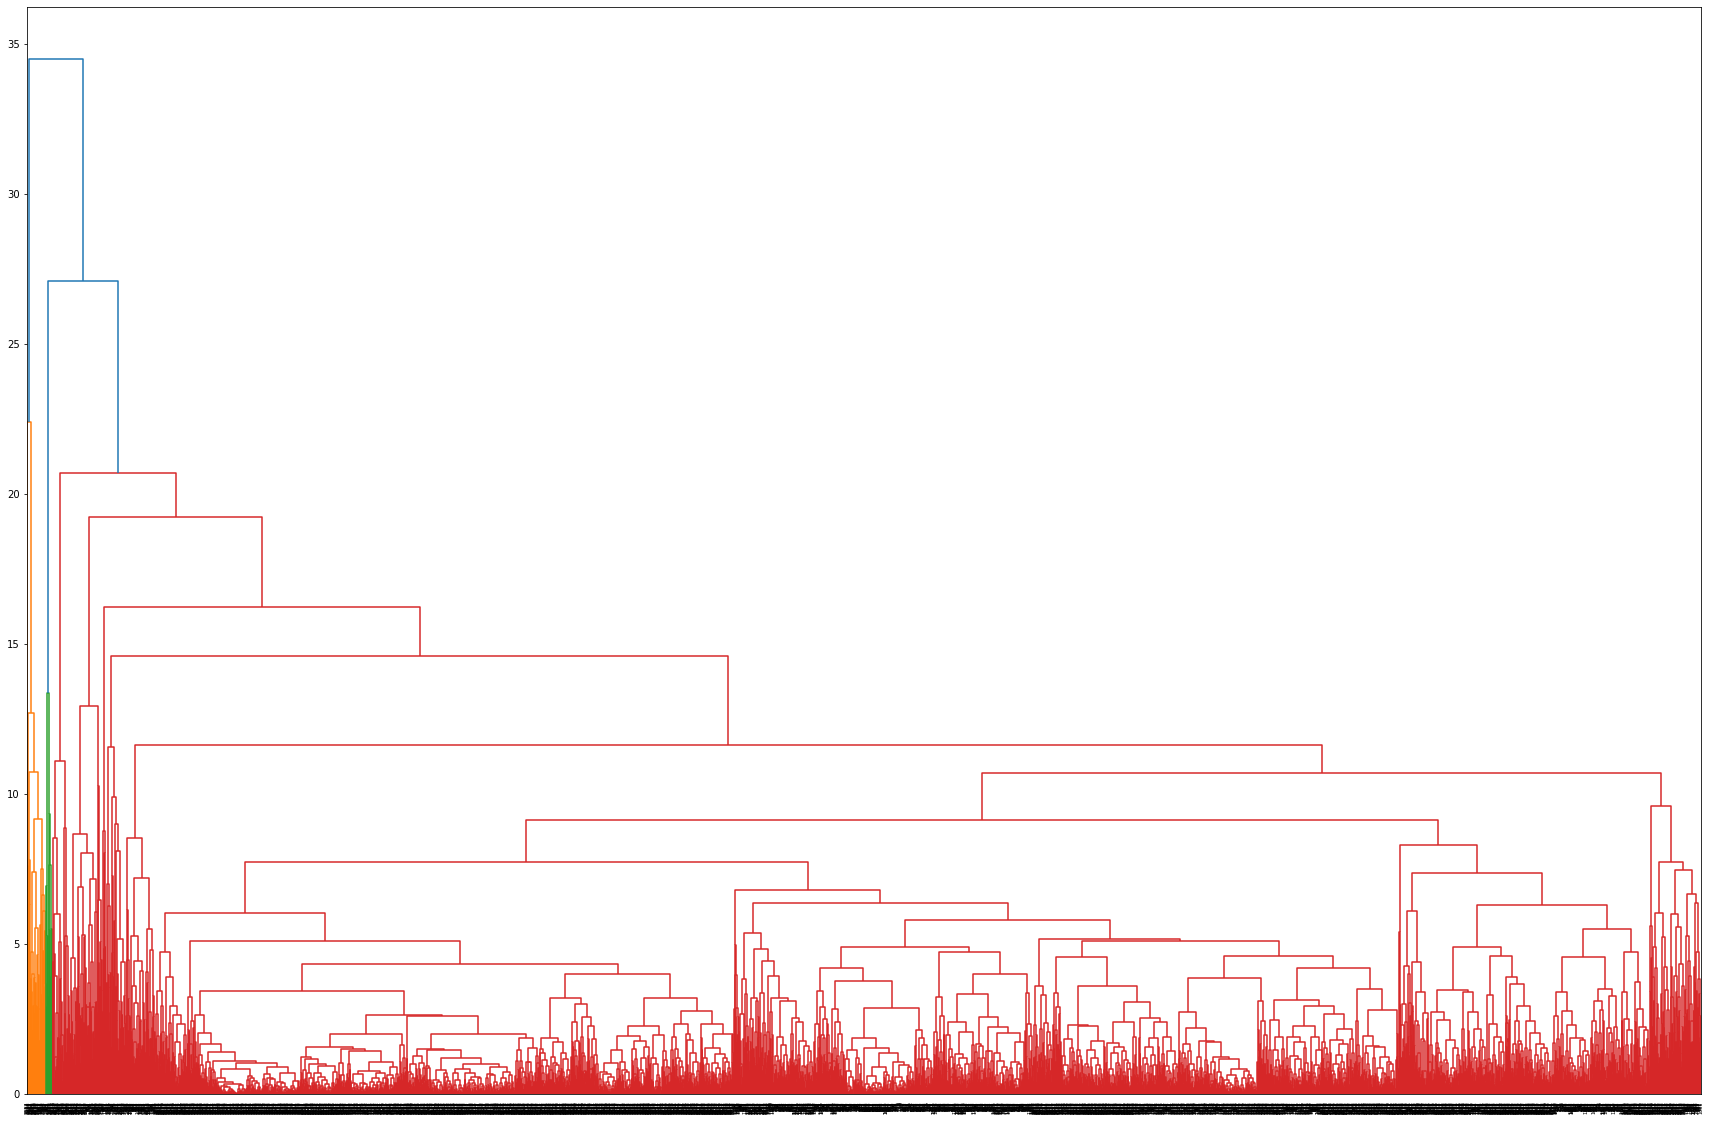

In [29]:
plt.figure(figsize = (30,20))
dendrogram = sch.dendrogram(sch.linkage(scaled, method='complete'))

In [29]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [30]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [31]:
predicted = hc.fit_predict(scaled)

In [32]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
hc_lables = hc.labels_
hc_lables

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
score = silhouette_score(scaled,hc_lables)

In [37]:
score

0.6085679190624473

In [65]:
hc1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [66]:
p1 = hc1.fit_predict(scaled)

In [67]:
l1 = hc1.labels_
l1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
score1 = silhouette_score(scaled,l1)
score1

0.6301922780112208

In [42]:
hc2 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')

In [43]:
p2 = hc2.fit_predict(scaled)

In [44]:
l2 = hc2.labels_
l2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
score2 = silhouette_score(scaled,l2)
score2

0.6240776658359006

In [ ]:
# choosing number of clusters as 3 as it gives best score

In [73]:
Agg_clusters = pd.DataFrame( p1, columns = ['Aggclusters'])
Agg_clusters

,Aggclusters
0,1
1,1
2,1
3,1
4,1
...,...
3993,1
3994,1
3995,1
3996,1


In [101]:
Agg_clusters['Aggclusters'].value_counts()

1    3937
0      46
2      15
Name: Aggclusters, dtype: int64

# KMEANS CLUSTERING

In [71]:
from sklearn.cluster import KMeans

## using silhouette plot to determine best K value

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

In [52]:
kmeans = KMeans(n_clusters = 3 , random_state = 42)

In [53]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

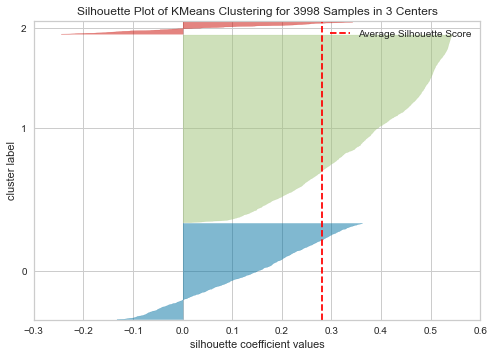

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
visualizer.fit(scaled)        
visualizer.show()

In [55]:
kmeans1 = KMeans(n_clusters = 2 , random_state = 42)

In [57]:
visualizer1 = SilhouetteVisualizer(kmeans1, colors='yellowbrick')

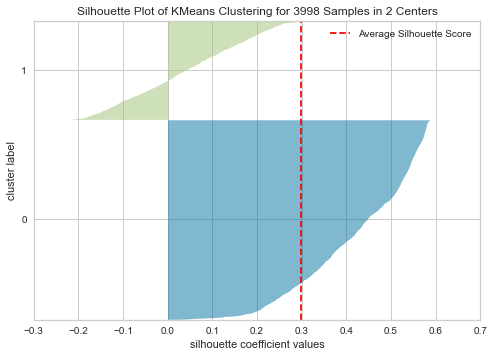

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
visualizer1.fit(scaled)
visualizer1.show()

In [59]:
kmeans2 = KMeans(n_clusters = 4 , random_state = 42)

In [60]:
visualizer2 = SilhouetteVisualizer(kmeans2, colors='yellowbrick')

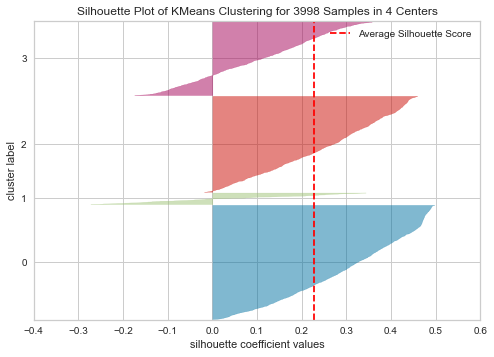

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
visualizer2.fit(scaled)
visualizer2.show()

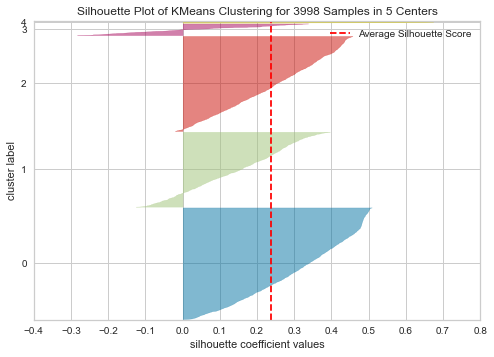

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
kmeans3 = KMeans(n_clusters = 5 , random_state = 42)
visualizer3 = SilhouetteVisualizer(kmeans3, colors='yellowbrick')
visualizer3.fit(scaled)
visualizer3.show()

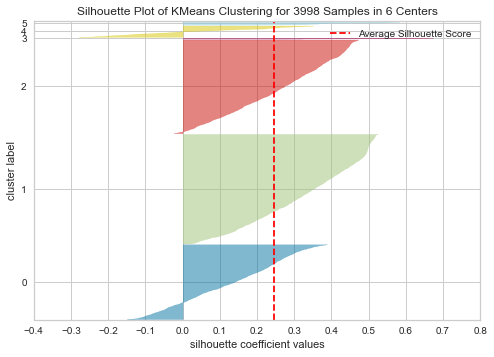

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
kmeans4 = KMeans(n_clusters = 6 , random_state = 42)
visualizer4 = SilhouetteVisualizer(kmeans4, colors='yellowbrick')
visualizer4.fit(scaled)
visualizer4.show()

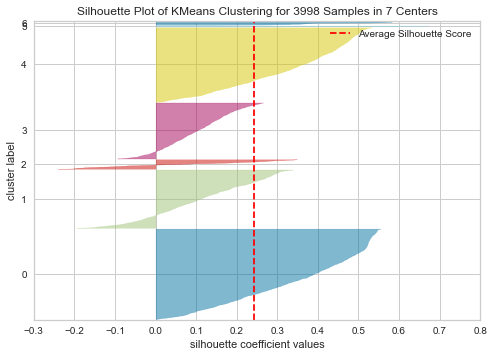

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
kmeans5 = KMeans(n_clusters = 7 , random_state = 42)
visualizer5 = SilhouetteVisualizer(kmeans5, colors='yellowbrick')
visualizer5.fit(scaled)
visualizer5.show()

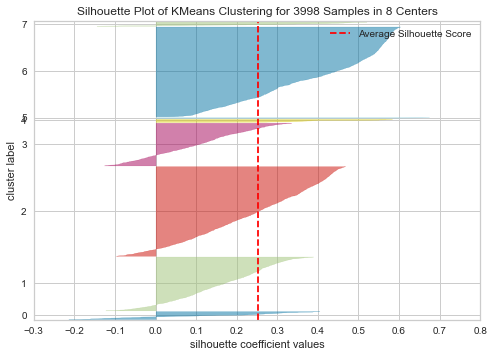

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
kmeans6 = KMeans(n_clusters = 8 , random_state = 42)
visualizer6 = SilhouetteVisualizer(kmeans6, colors='yellowbrick')
visualizer6.fit(scaled)
visualizer6.show()

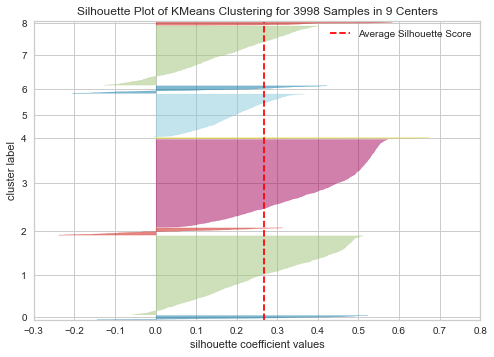

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [66]:
kmeans7 = KMeans(n_clusters = 9 , random_state = 42)
visualizer7 = SilhouetteVisualizer(kmeans7, colors='yellowbrick')
visualizer7.fit(scaled)
visualizer7.show()

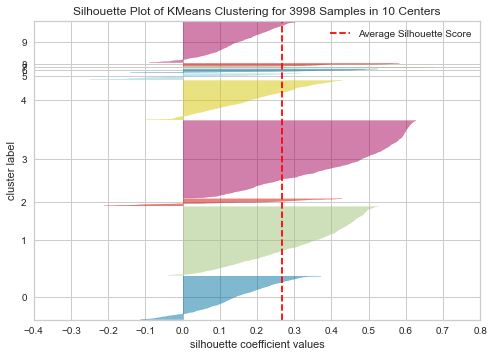

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [67]:
kmeans8 = KMeans(n_clusters = 10 , random_state = 42)
visualizer8 = SilhouetteVisualizer(kmeans8, colors='yellowbrick')
visualizer8.fit(scaled)
visualizer8.show()

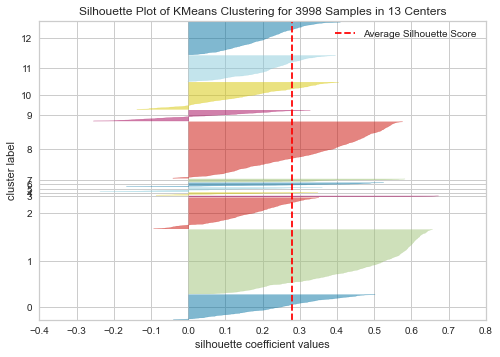

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [68]:
kmeans9 = KMeans(n_clusters = 13 , random_state = 42)
visualizer9 = SilhouetteVisualizer(kmeans9, colors='yellowbrick')
visualizer9.fit(scaled)
visualizer9.show()

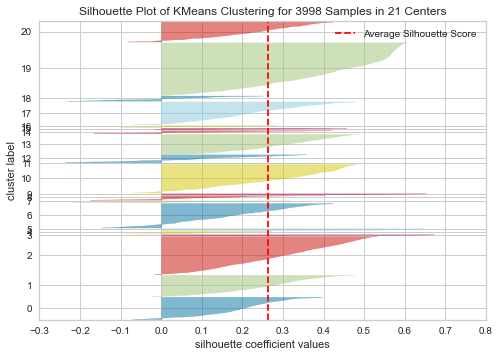

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 21 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
kmeans10 = KMeans(n_clusters = 21 , random_state = 42)
visualizer10 = SilhouetteVisualizer(kmeans10, colors='yellowbrick')
visualizer10.fit(scaled)
visualizer10.show()

In [ ]:
# Checking best silhouette score using number of clusters from a range of 2 to 100

In [70]:
from sklearn.metrics import silhouette_score

In [ ]:
Sscore = []
for i in range(2,100):
    kmeans = KMeans(n_clusters=i,random_state=42)
    pred = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled,pred, metric='euclidean')
    Sscore.append(score)

In [72]:
Sscore

[0.29788960215683197,
 0.28170264118567995,
 0.22786348301505222,
 0.23848516335767,
 0.2468838462871441,
 0.2422355658686985,
 0.25214891643785803,
 0.2661911794151273,
 0.2664988138964427,
 0.2742836435895064,
 0.2798931812500011,
 0.278623378824656,
 0.283998796551987,
 0.27832541806384786,
 0.2821790389206618,
 0.25662518543659757,
 0.25845399128742796,
 0.25339893509872935,
 0.2613983918862659,
 0.26319020054396364,
 0.26360633909010794,
 0.2537721638858896,
 0.258961805137163,
 0.2627748028749592,
 0.2344260868401355,
 0.2576493011464625,
 0.25845854716396793,
 0.2551196400337679,
 0.25579643331410884,
 0.2512810130226243,
 0.23725333834633316,
 0.23703063306822694,
 0.2588450101402011,
 0.23816616484292577,
 0.24323988383787293,
 0.22786499860267584,
 0.2298169577941304,
 0.2442305362147805,
 0.22966792229612618,
 0.2325664067878309,
 0.23361014104023087,
 0.22867046663572746,
 0.2348247071554302,
 0.23274256267810794,
 0.23157818351199205,
 0.2310906938894182,
 0.24161417143453

In [ ]:
# selecting number of clusters as 2 that gives best silhouette score

In [74]:
kmeans = KMeans(n_clusters=2 ,random_state=42)
pred = kmeans.fit_predict(scaled)
score = silhouette_score(scaled,pred, metric='euclidean')
score

0.29788960215683197

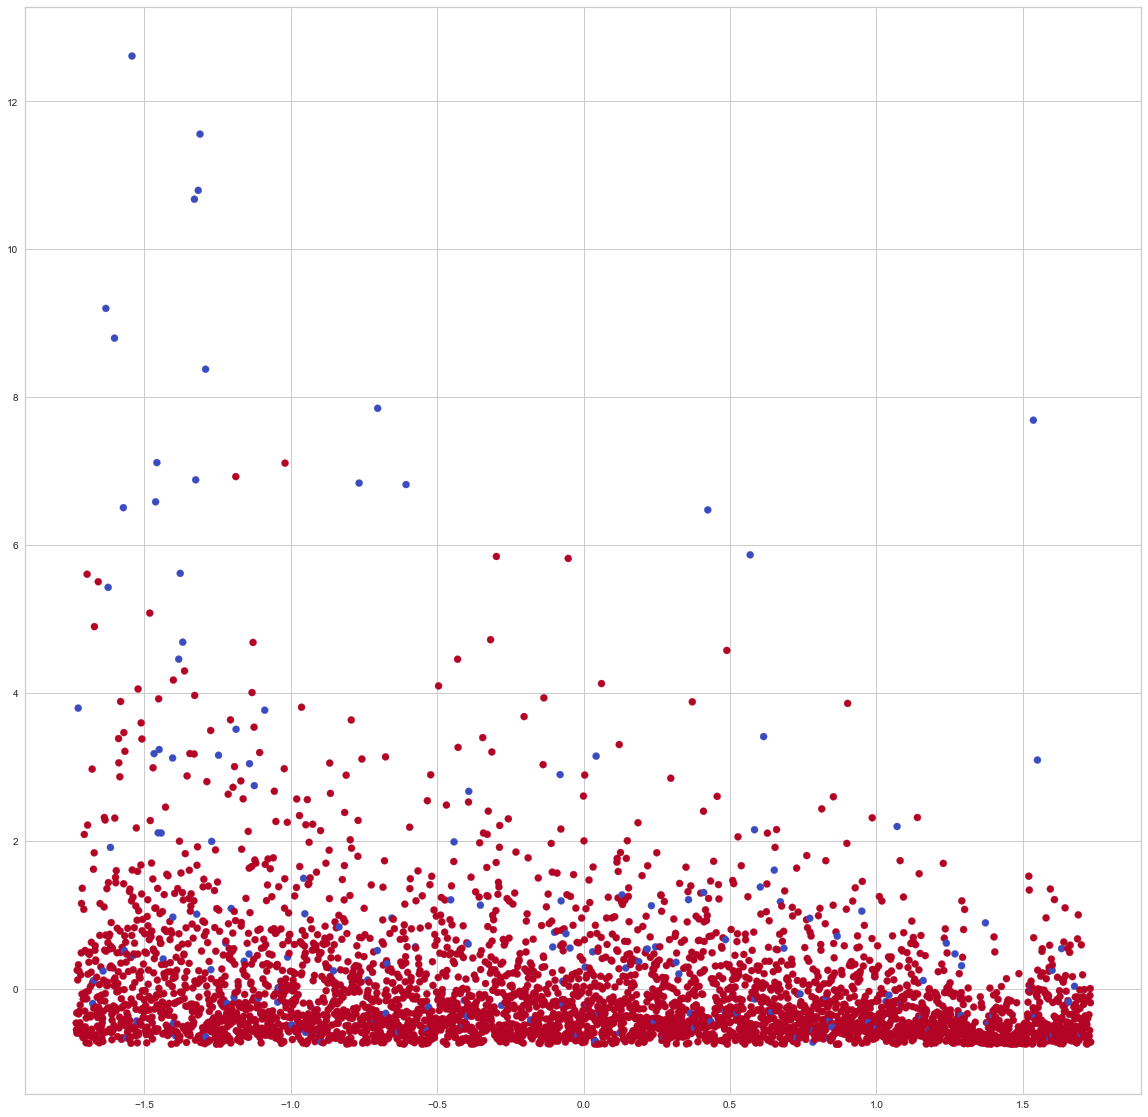

In [156]:
plt.figure(figsize = (20,20))
plt.scatter(scaled[:, 0], scaled[:, 1],c = pred,
            s=50, cmap='coolwarm')

In [75]:
K_clusters = pd.DataFrame(pred , columns = ['KClusters'])
K_clusters

,KClusters
0,0
1,0
2,0
3,0
4,1
...,...
3993,0
3994,0
3995,0
3996,0


In [103]:
K_clusters['KClusters'].value_counts()

0    2683
1    1315
Name: KClusters, dtype: int64

# DBSCAN clustering

## using k distance plot to find best eps value

Text(0, 0.5, 'Distance')

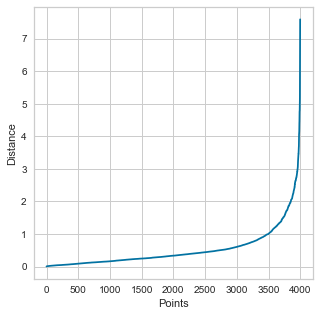

In [75]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(scaled)

distances, indices = neighbors.kneighbors(scaled)
distances = np.sort(distances[:,1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [77]:
from sklearn.cluster import DBSCAN

In [78]:
dbscan = DBSCAN(eps= 3, min_samples=25)

In [79]:
pred = dbscan.fit_predict(scaled)

In [80]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
DB_clusters=pd.DataFrame(dbscan.labels_ , columns = ['DBclusters'])
DB_clusters

,DBclusters
0,0
1,0
2,0
3,0
4,0
...,...
3993,0
3994,0
3995,0
3996,0


In [83]:
DB_clusters['DBclusters'].value_counts()

 0    3830
-1     168
Name: DBclusters, dtype: int64

In [132]:
silhouette_score(scaled,dbscan.labels_)

0.6305856209058827

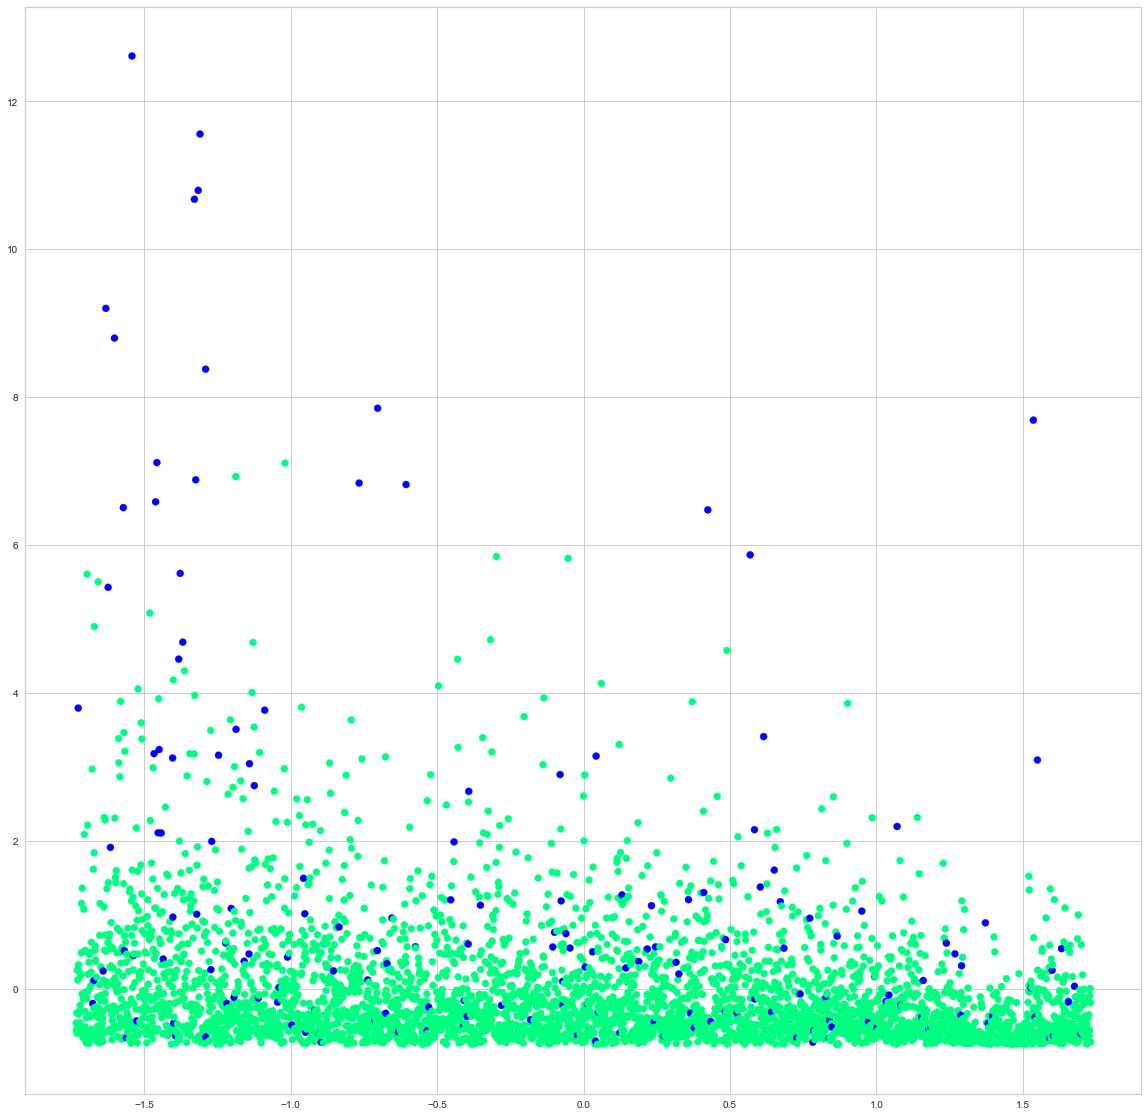

In [164]:

plt.figure(figsize = (20,20))
plt.scatter(scaled[:, 0], scaled[:, 1], c = pred, s=50 ,cmap='winter')


In [99]:
Airline_clusters = pd.concat([Airline,K_clusters,Agg_clusters,DB_clusters] , axis = 1)

In [100]:
Airline_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KClusters,Aggclusters,DBclusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0,1,0
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,0,1,0


In [ ]:
# Agglomerative clustering gave a good silhouette score when 3 clusters were considered , 98% of the data went into cluster 1
#KMeans clustering gave a good score when 2 clusters were formed , 67% of the data went into cluster 0 while remaining into cluster 1
# Using DBSCAN clustering , clustered most of the data while only 4% outliers were detected 